In [1]:
import numpy as np
from System_backend import *
import matplotlib.pyplot as plt
import ellipse as ell
import tqdm
%matplotlib widget

In [9]:
ell_tot = 100.
distance_anchor = 50.
rho0 = 0.01
temperature = 10000.

(28, 3)


Text(0.5, 0, 'z')

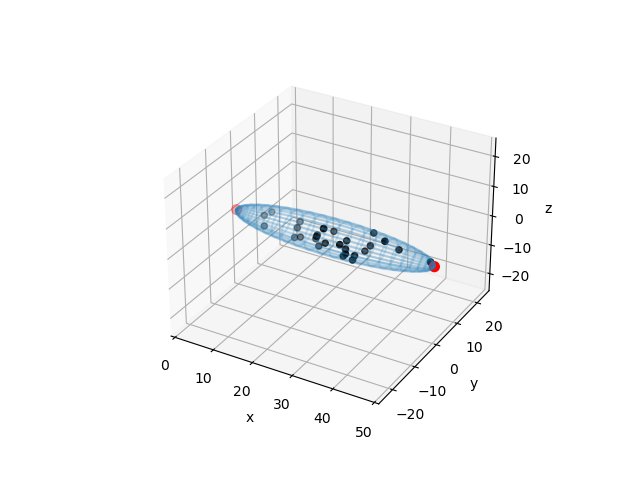

In [10]:
S = System(ell_tot,distance_anchor,rho0,temperature)
r = S.get_r()
print(r.shape)
R = S.get_R()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

Ell = S.get_ell()
for i in range(0,R.shape[0]-1):
    #axes = ell.construct_axes_from_main_axe((R[i+1]-R[i])/2,np.sqrt(Ell[i])/2)
    #print(axes)
    if np.linalg.norm(R[i+1]-R[i]) < Ell[i]*0.1:
        a = np.sqrt(Ell[i])*0.5
        b = np.sqrt(Ell[i])*0.5

    else:
        a = np.linalg.norm(R[i+1]-R[i])/2
        b = np.sqrt(Ell[i])*0.5
    xel,yel,zel = ell.ellipse_from_main_ax(-(R[i+1]-R[i])/2,a,b,[0.5*(R[i,0]+R[i+1,0]),0.5*(R[i+1,1]+R[i,1]),(R[i+1,2]+R[i,2])*0.5])
    ax.plot_wireframe(xel, yel, zel,  rstride=4, cstride=4, color='#2980b9', alpha=0.2)

ax.set_xlim(min(R[:,0]),max(R[:,0]))
ax.set_ylim(-25,25)
ax.set_zlim(-25,25)

ax.scatter(r[:,0],r[:,1],r[:,2],color='black')
ax.scatter(R[:,0],R[:,1],R[:,2],s=50,color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [11]:
plt.close()

In [12]:
time_tot = 10000
Ells = np.zeros(time_tot,dtype=float)
Ns = np.zeros(time_tot,dtype=float)
for t in tqdm.tqdm(range(time_tot)):
    S.evolve()
    Ells[t] = np.mean(S.get_ell())
    Ns[t] = S.get_N_loop()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 6100.55it/s]


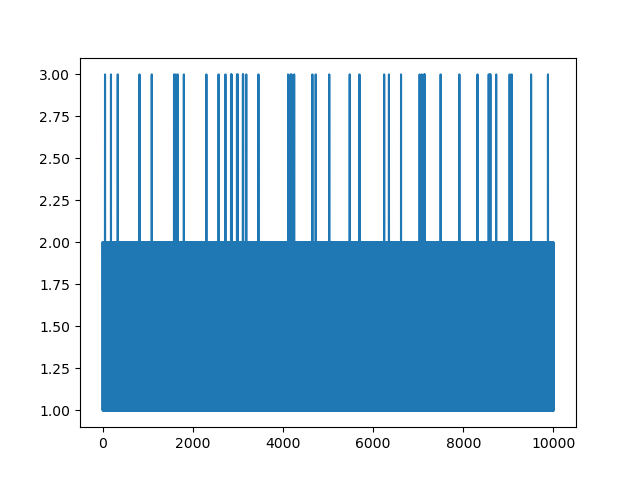

In [13]:
fig,ax = plt.subplots()
plt.plot(np.arange(0,time_tot,1),Ns)

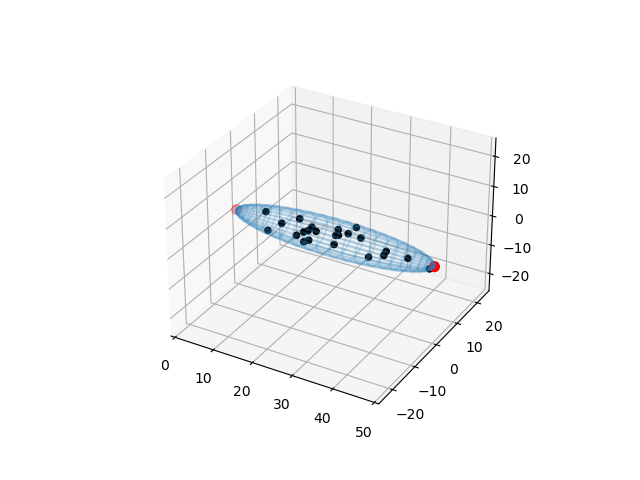

In [14]:
r = S.get_r()
R = S.get_R()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

Ell = S.get_ell()
for i in range(0,R.shape[0]-1):
    #axes = ell.construct_axes_from_main_axe((R[i+1]-R[i])/2,np.sqrt(Ell[i])/2)
    ctr = [0.5*(R[i,0]+R[i+1,0]),0.5*(R[i+1,1]+R[i,1]),(R[i+1,2]+R[i,2])*0.5]
    if np.linalg.norm(R[i+1]-R[i]) < Ell[i]*0.1:
        a = np.sqrt(Ell[i])*0.5
        b = np.sqrt(Ell[i])*0.5
    else:
        a = np.linalg.norm(R[i+1]-R[i])/2
        b = np.sqrt(Ell[i])*0.5
    xel,yel,zel = ell.ellipse_from_main_ax(-(R[i+1]-R[i])/2,a,b,[0.5*(R[i,0]+R[i+1,0]),0.5*(R[i+1,1]+R[i,1]),(R[i+1,2]+R[i,2])*0.5])
    ax.plot_wireframe(xel, yel, zel,  rstride=4, cstride=4, color='#2980b9', alpha=0.2)
    #ax.plot([ctr[0]-axes[0][0],ctr[0]+axes[0][0]],[ctr[1]-axes[0][1],ctr[1]+axes[0][1]],[ctr[2]-axes[0][2],ctr[2]+axes[0][2]],color='green')

ax.set_xlim(0,50)
ax.set_ylim(-25,25)
ax.set_zlim(-25,25)

ax.scatter(r[:,0],r[:,1],r[:,2],color='black',alpha=1.)
ax.scatter(R[:,0],R[:,1],R[:,2],s=50,color='red')

In [9]:
S.Print_loop_positions()

theta Phi 0.0506612 0.0706024
xg,yg,zg 18.6867 0.9475 -1.32152
volume 1246.4
ell 63.454
anchoring points. left :0 0 0 right : 37.3733 1.895 -2.64304
number of crosslinkers of this loop :127

theta Phi -0.148967 -0.206343
xg,yg,zg 43.6867 0.9475 -1.32152
volume 249.503
ell 36.546
anchoring points. left :37.3733 1.895 -2.64304 right : 50 0 0
number of crosslinkers of this loop :22



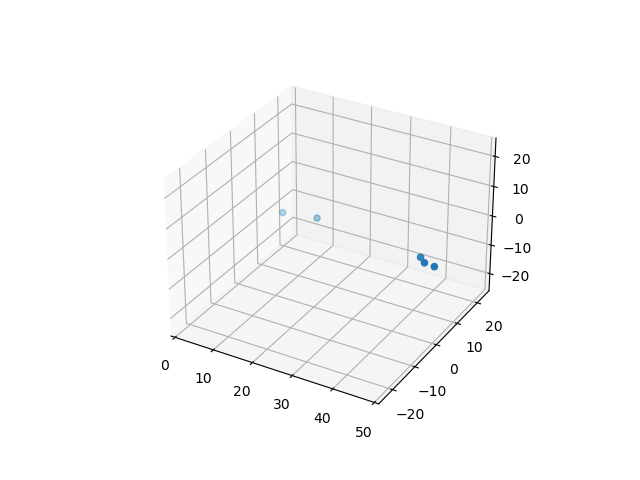

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim(0,50)
ax.set_ylim(-25,25)
ax.set_zlim(-25,25)
ax.scatter(R[:,0],R[:,1],R[:,2])